# Analyzing GoBike System Data

### by Hao-Wei Chen

### Table of Contents
- [Introduction](#intro)
- [Preliminary Wrangling](#prelim)
- [Univariate Exploration](#univariate)
- [Bivariate Exploration](#bivariate)
- [Multivariate Exploration](#multivariate)
- [Summary](#summary)
- [Sources](#sources)

<a id='intro'></a>
## Introduction 
>The data I used for this project is from GoBike System Data. GoBile System (Bay Wheels) is a regional public bicycle sharing system in the San Francisco Bay Area, California operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. On June 28, 2017, the system officially re-launched as Ford GoBike in a partnership with Ford Motor Company. After Motivate's acquisition by Lyft, the system was subsequently renamed to Bay Wheels in June 2019. The system is expected to expand to 7,000 bicycles around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose.

<a id='prelim'></a>
## Preliminary Wrangling

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import glob
import os
import datetime
from datetime import timedelta
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('202006-baywheels-tripdata.csv')

In [3]:
# Observing the first 5 rows
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,08A4A9F7315901F3,electric_bike,2020-06-03 16:37:10,2020-06-03 16:48:28,NaN,NaN,NaN,NaN,37.770000,-122.40000,37.760000,-122.420000,casual
1,844F9D906468C441,electric_bike,2020-06-03 12:22:47,2020-06-03 12:44:02,NaN,NaN,NaN,NaN,37.780000,-122.49000,37.780000,-122.460000,casual
2,0E441BF8A86C544E,electric_bike,2020-06-02 17:37:43,2020-06-02 17:52:21,Powell St at Columbus Ave,487.0,NaN,NaN,37.800426,-122.41095,37.790000,-122.440000,casual
3,CAFE64864422F475,electric_bike,2020-06-02 18:13:01,2020-06-02 18:48:30,NaN,NaN,NaN,NaN,37.760000,-122.41000,37.770000,-122.430000,casual
4,172957A20160D568,electric_bike,2020-06-03 15:16:06,2020-06-03 16:06:10,Church St at Duboce Ave,85.0,48th Ave at Cabrillo St,521.0,37.769841,-122.42921,37.772894,-122.509079,casual


In [4]:
df.sample(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
79090,5254BAD0C66CCD39,docked_bike,2020-06-21 18:10:53,2020-06-21 18:38:38,Market St at Steuart St,16.0,Cruise Terminal at Pier 27,462.0,37.794497,-122.394838,37.804648,-122.402087,casual
12591,CB5AC99652B4418A,electric_bike,2020-06-08 12:44:33,2020-06-08 12:55:37,NaN,NaN,NaN,NaN,37.800000,-122.410000,37.780000,-122.410000,casual
91417,A58A5906688E4E68,electric_bike,2020-06-10 10:10:43,2020-06-10 10:27:39,NaN,NaN,4th St at Mission Bay Blvd S,93.0,37.810000,-122.410000,37.770508,-122.391216,member
128527,CE509B9D9BF404CD,docked_bike,2020-06-13 14:11:20,2020-06-13 15:20:55,Funston Ave at Irving St,450.0,Funston Ave at Irving St,450.0,37.763934,-122.470650,37.763934,-122.470651,casual
104069,C2388B4AB5C8C2DF,electric_bike,2020-06-17 17:05:29,2020-06-17 17:17:42,Union Square (Powell St at Post St),324.0,Rhode Island St at 17th St,114.0,37.788483,-122.408368,37.764397,-122.402633,member
38721,AA4613B3F97005B3,electric_bike,2020-06-05 15:19:39,2020-06-05 15:25:55,Octavia Blvd at Page St,411.0,NaN,NaN,37.774207,-122.423867,37.770000,-122.430000,casual
34483,4DC139D9E549BE96,electric_bike,2020-06-03 14:30:30,2020-06-03 14:40:51,NaN,NaN,19th St at Florida St,124.0,37.760000,-122.440000,37.760422,-122.410815,casual
118096,8F8EDC46B5CA24BA,electric_bike,2020-06-03 19:39:16,2020-06-03 20:17:32,NaN,NaN,NaN,NaN,37.800000,-122.430000,37.770000,-122.440000,member
20379,F985740BED43AB11,electric_bike,2020-06-08 16:42:08,2020-06-08 17:00:51,NaN,NaN,NaN,NaN,37.740000,-122.510000,37.770000,-122.510000,casual
50380,E5880B3902E30F53,electric_bike,2020-06-03 19:56:22,2020-06-03 20:12:45,Church St at Duboce Ave,85.0,NaN,NaN,37.769876,-122.429146,37.780000,-122.470000,casual


In [5]:
df.describe()

,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng
count,99220.000000,97151.000000,158168.000000,158168.000000,157892.000000,157892.000000
mean,222.670762,220.933104,37.730514,-122.353640,37.730497,-122.353779
std,170.109389,169.794631,0.140991,0.170709,0.141111,0.170778
min,3.000000,3.000000,37.240000,-122.510000,37.230000,-122.540000
25%,73.000000,73.000000,37.760000,-122.431873,37.760000,-122.431184
50%,156.000000,149.000000,37.773717,-122.412036,37.773532,-122.412073
75%,381.000000,380.000000,37.788396,-122.391173,37.788927,-122.391198
max,532.000000,532.000000,37.880222,-121.770000,37.950000,-121.760000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158168 entries, 0 to 158167
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             158168 non-null  object 
 1   rideable_type       158168 non-null  object 
 2   started_at          158168 non-null  object 
 3   ended_at            158168 non-null  object 
 4   start_station_name  99220 non-null   object 
 5   start_station_id    99220 non-null   float64
 6   end_station_name    97151 non-null   object 
 7   end_station_id      97151 non-null   float64
 8   start_lat           158168 non-null  float64
 9   start_lng           158168 non-null  float64
 10  end_lat             157892 non-null  float64
 11  end_lng             157892 non-null  float64
 12  member_casual       158168 non-null  object 
dtypes: float64(6), object(7)
memory usage: 15.7+ MB


In [7]:
# Copy the orginal dataFrame to the new one
df_clean = df.copy()

In [8]:
# Transfer start_station_id and end_station_id from float64 to object
df_clean.start_station_id = str(df_clean.start_station_id)
df_clean.end_station_id = str(df_clean.end_station_id)

In [9]:
# Chenck the data type again
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158168 entries, 0 to 158167
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             158168 non-null  object 
 1   rideable_type       158168 non-null  object 
 2   started_at          158168 non-null  object 
 3   ended_at            158168 non-null  object 
 4   start_station_name  99220 non-null   object 
 5   start_station_id    158168 non-null  object 
 6   end_station_name    97151 non-null   object 
 7   end_station_id      158168 non-null  object 
 8   start_lat           158168 non-null  float64
 9   start_lng           158168 non-null  float64
 10  end_lat             157892 non-null  float64
 11  end_lng             157892 non-null  float64
 12  member_casual       158168 non-null  object 
dtypes: float64(4), object(9)
memory usage: 15.7+ MB


In [10]:
# drop any missing value
df_clean.dropna(inplace=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79900 entries, 4 to 158167
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ride_id             79900 non-null  object 
 1   rideable_type       79900 non-null  object 
 2   started_at          79900 non-null  object 
 3   ended_at            79900 non-null  object 
 4   start_station_name  79900 non-null  object 
 5   start_station_id    79900 non-null  object 
 6   end_station_name    79900 non-null  object 
 7   end_station_id      79900 non-null  object 
 8   start_lat           79900 non-null  float64
 9   start_lng           79900 non-null  float64
 10  end_lat             79900 non-null  float64
 11  end_lng             79900 non-null  float64
 12  member_casual       79900 non-null  object 
dtypes: float64(4), object(9)
memory usage: 8.5+ MB


In [11]:
df_clean.member_casual.value_counts()

casual    43470
member    36430
Name: member_casual, dtype: int64

In [12]:
df_clean.duplicated().sum()

0

In [13]:
#Transfer start_time and end_time to datetime type
df_clean.started_at = pd.to_datetime(df_clean.started_at)
df_clean.ended_at = pd.to_datetime(df_clean.ended_at)

In [14]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79900 entries, 4 to 158167
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ride_id             79900 non-null  object        
 1   rideable_type       79900 non-null  object        
 2   started_at          79900 non-null  datetime64[ns]
 3   ended_at            79900 non-null  datetime64[ns]
 4   start_station_name  79900 non-null  object        
 5   start_station_id    79900 non-null  object        
 6   end_station_name    79900 non-null  object        
 7   end_station_id      79900 non-null  object        
 8   start_lat           79900 non-null  float64       
 9   start_lng           79900 non-null  float64       
 10  end_lat             79900 non-null  float64       
 11  end_lng             79900 non-null  float64       
 12  member_casual       79900 non-null  object        
dtypes: datetime64[ns](2), float64(4), object(7)
m

In [15]:
df_clean['started_yr_mo']=df_clean['started_at'].map(lambda x: x.strftime('%Y-%m'))
df_clean['ended_yr_mo']=df_clean['ended_at'].map(lambda x: x.strftime('%Y-%m'))

In [16]:
df_clean.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,started_yr_mo,ended_yr_mo
4,172957A20160D568,electric_bike,2020-06-03 15:16:06,2020-06-03 16:06:10,Church St at Duboce Ave,0 NaN\n1 NaN\n2 48...,48th Ave at Cabrillo St,0 NaN\n1 NaN\n2 ...,37.769841,-122.429210,37.772894,-122.509079,casual,2020-06,2020-06
8,AC29BDD9051D1827,electric_bike,2020-06-03 12:13:30,2020-06-03 12:36:27,Cesar Chavez St at Dolores St,0 NaN\n1 NaN\n2 48...,4th St at 16th St,0 NaN\n1 NaN\n2 ...,37.747758,-122.425121,37.767008,-122.390851,casual,2020-06,2020-06
14,7E0C4C5917A9EEC2,electric_bike,2020-06-02 19:18:23,2020-06-02 19:46:05,The Embarcadero at Vallejo St,0 NaN\n1 NaN\n2 48...,Hyde St at Post St,0 NaN\n1 NaN\n2 ...,37.799943,-122.398562,37.787527,-122.416830,casual,2020-06,2020-06
19,6B0E4BF2BBD49A9D,electric_bike,2020-06-03 10:06:26,2020-06-03 10:38:15,Green St at Van Ness Ave,0 NaN\n1 NaN\n2 48...,Green St at Van Ness Ave,0 NaN\n1 NaN\n2 ...,37.797636,-122.423418,37.797653,-122.423335,casual,2020-06,2020-06
22,27C607CB14528333,electric_bike,2020-06-03 13:09:05,2020-06-03 13:31:33,4th St at 16th St,0 NaN\n1 NaN\n2 48...,Cesar Chavez St at Dolores St,0 NaN\n1 NaN\n2 ...,37.767064,-122.390900,37.747827,-122.425056,casual,2020-06,2020-06


In [17]:
df_clean['started_at_hour']=df_clean['started_at'].dt.hour
df_clean['ended_at_hour']=df_clean['ended_at'].dt.hour

In [18]:
df_clean['started_at_min'] = df_clean['started_at'].dt.minute
df_clean['ended_at_min'] = df_clean['ended_at'].dt.minute

In [19]:
df_clean['started_at_sec'] = df_clean['started_at'].dt.second
df_clean['ended_at_sec'] = df_clean['ended_at'].dt.second

In [20]:
df_clean['started_at_mon'] = df_clean['started_at'].dt.strftime('%B')
df_clean['ended_at_mon'] = df_clean['ended_at'].dt.strftime('%B')

In [21]:
# Start time weekday
df_clean['started_at_weekday'] = df_clean['started_at'].dt.strftime('%a')

In [22]:
df_clean.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,ended_yr_mo,started_at_hour,ended_at_hour,started_at_min,ended_at_min,started_at_sec,ended_at_sec,started_at_mon,ended_at_mon,started_at_weekday
4,172957A20160D568,electric_bike,2020-06-03 15:16:06,2020-06-03 16:06:10,Church St at Duboce Ave,0 NaN\n1 NaN\n2 48...,48th Ave at Cabrillo St,0 NaN\n1 NaN\n2 ...,37.769841,-122.429210,...,2020-06,15,16,16,6,6,10,June,June,Wed
8,AC29BDD9051D1827,electric_bike,2020-06-03 12:13:30,2020-06-03 12:36:27,Cesar Chavez St at Dolores St,0 NaN\n1 NaN\n2 48...,4th St at 16th St,0 NaN\n1 NaN\n2 ...,37.747758,-122.425121,...,2020-06,12,12,13,36,30,27,June,June,Wed
14,7E0C4C5917A9EEC2,electric_bike,2020-06-02 19:18:23,2020-06-02 19:46:05,The Embarcadero at Vallejo St,0 NaN\n1 NaN\n2 48...,Hyde St at Post St,0 NaN\n1 NaN\n2 ...,37.799943,-122.398562,...,2020-06,19,19,18,46,23,5,June,June,Tue
19,6B0E4BF2BBD49A9D,electric_bike,2020-06-03 10:06:26,2020-06-03 10:38:15,Green St at Van Ness Ave,0 NaN\n1 NaN\n2 48...,Green St at Van Ness Ave,0 NaN\n1 NaN\n2 ...,37.797636,-122.423418,...,2020-06,10,10,6,38,26,15,June,June,Wed
22,27C607CB14528333,electric_bike,2020-06-03 13:09:05,2020-06-03 13:31:33,4th St at 16th St,0 NaN\n1 NaN\n2 48...,Cesar Chavez St at Dolores St,0 NaN\n1 NaN\n2 ...,37.767064,-122.390900,...,2020-06,13,13,9,31,5,33,June,June,Wed


In [23]:
df_clean['started_total_sec'] = (df_clean['started_at_hour']*60+df_clean['started_at_min'])*60+df_clean['started_at_sec']

In [24]:
df_clean['ended_total_sec'] = (df_clean['ended_at_hour']*60+df_clean['ended_at_min'])*60+df_clean['ended_at_sec']

In [25]:
df_clean['duration_sec'] = df_clean['ended_total_sec'] - df_clean['started_total_sec']

In [26]:
df_clean['duration_min'] = df_clean['duration_sec'] / 60

In [27]:
df_clean['duration_hr'] = df_clean['duration_min'] / 60

In [28]:
# Check the new columns I created
df_clean.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,started_at_sec,ended_at_sec,started_at_mon,ended_at_mon,started_at_weekday,started_total_sec,ended_total_sec,duration_sec,duration_min,duration_hr
4,172957A20160D568,electric_bike,2020-06-03 15:16:06,2020-06-03 16:06:10,Church St at Duboce Ave,0 NaN\n1 NaN\n2 48...,48th Ave at Cabrillo St,0 NaN\n1 NaN\n2 ...,37.769841,-122.429210,...,6,10,June,June,Wed,54966,57970,3004,50.066667,0.834444
8,AC29BDD9051D1827,electric_bike,2020-06-03 12:13:30,2020-06-03 12:36:27,Cesar Chavez St at Dolores St,0 NaN\n1 NaN\n2 48...,4th St at 16th St,0 NaN\n1 NaN\n2 ...,37.747758,-122.425121,...,30,27,June,June,Wed,44010,45387,1377,22.950000,0.382500
14,7E0C4C5917A9EEC2,electric_bike,2020-06-02 19:18:23,2020-06-02 19:46:05,The Embarcadero at Vallejo St,0 NaN\n1 NaN\n2 48...,Hyde St at Post St,0 NaN\n1 NaN\n2 ...,37.799943,-122.398562,...,23,5,June,June,Tue,69503,71165,1662,27.700000,0.461667
19,6B0E4BF2BBD49A9D,electric_bike,2020-06-03 10:06:26,2020-06-03 10:38:15,Green St at Van Ness Ave,0 NaN\n1 NaN\n2 48...,Green St at Van Ness Ave,0 NaN\n1 NaN\n2 ...,37.797636,-122.423418,...,26,15,June,June,Wed,36386,38295,1909,31.816667,0.530278
22,27C607CB14528333,electric_bike,2020-06-03 13:09:05,2020-06-03 13:31:33,4th St at 16th St,0 NaN\n1 NaN\n2 48...,Cesar Chavez St at Dolores St,0 NaN\n1 NaN\n2 ...,37.767064,-122.390900,...,5,33,June,June,Wed,47345,48693,1348,22.466667,0.374444


The code below is for calcuating the distance between start station and end station. I created the formula 'distacnce' and base on the original columns 'start_lat', 'start_Ing', 'end_lat', 'end_Ing' to generate the new column 'distance'

In [29]:
import math
from math import radians, sin, cos, acos

def distance(origin, destination):

    lat1, long1 = origin
    lat2, long2 = destination
    radius = 6371
    # this is in kilometers - will convert to US units of miles after

    dlat = math.radians(lat2 - lat1)
    dlong = math.radians(long2 - long1)
    
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlong / 2) * math.sin(dlong / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [30]:
df_clean['distance_km'] = df_clean.apply(lambda x: distance((x['start_lat'], x['start_lng']), (x['end_lat'], x['end_lng'])), axis=1)

In [31]:
# Check the result
df_clean.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,ended_at_sec,started_at_mon,ended_at_mon,started_at_weekday,started_total_sec,ended_total_sec,duration_sec,duration_min,duration_hr,distance_km
4,172957A20160D568,electric_bike,2020-06-03 15:16:06,2020-06-03 16:06:10,Church St at Duboce Ave,0 NaN\n1 NaN\n2 48...,48th Ave at Cabrillo St,0 NaN\n1 NaN\n2 ...,37.769841,-122.429210,...,10,June,June,Wed,54966,57970,3004,50.066667,0.834444,7.028324
8,AC29BDD9051D1827,electric_bike,2020-06-03 12:13:30,2020-06-03 12:36:27,Cesar Chavez St at Dolores St,0 NaN\n1 NaN\n2 48...,4th St at 16th St,0 NaN\n1 NaN\n2 ...,37.747758,-122.425121,...,27,June,June,Wed,44010,45387,1377,22.950000,0.382500,3.695719
14,7E0C4C5917A9EEC2,electric_bike,2020-06-02 19:18:23,2020-06-02 19:46:05,The Embarcadero at Vallejo St,0 NaN\n1 NaN\n2 48...,Hyde St at Post St,0 NaN\n1 NaN\n2 ...,37.799943,-122.398562,...,5,June,June,Tue,69503,71165,1662,27.700000,0.461667,2.117242
19,6B0E4BF2BBD49A9D,electric_bike,2020-06-03 10:06:26,2020-06-03 10:38:15,Green St at Van Ness Ave,0 NaN\n1 NaN\n2 48...,Green St at Van Ness Ave,0 NaN\n1 NaN\n2 ...,37.797636,-122.423418,...,15,June,June,Wed,36386,38295,1909,31.816667,0.530278,0.007529
22,27C607CB14528333,electric_bike,2020-06-03 13:09:05,2020-06-03 13:31:33,4th St at 16th St,0 NaN\n1 NaN\n2 48...,Cesar Chavez St at Dolores St,0 NaN\n1 NaN\n2 ...,37.767064,-122.390900,...,33,June,June,Wed,47345,48693,1348,22.466667,0.374444,3.686783


In [32]:
# Only include the columns we want
df_clean = df_clean.drop(columns=['ended_at_hour', 'started_yr_mo', 'ended_yr_mo', 'started_at_min', 'ended_at_min', 'started_at_sec', 'ended_at_sec', 'started_total_sec', 'ended_total_sec'])

In [33]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79900 entries, 4 to 158167
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ride_id             79900 non-null  object        
 1   rideable_type       79900 non-null  object        
 2   started_at          79900 non-null  datetime64[ns]
 3   ended_at            79900 non-null  datetime64[ns]
 4   start_station_name  79900 non-null  object        
 5   start_station_id    79900 non-null  object        
 6   end_station_name    79900 non-null  object        
 7   end_station_id      79900 non-null  object        
 8   start_lat           79900 non-null  float64       
 9   start_lng           79900 non-null  float64       
 10  end_lat             79900 non-null  float64       
 11  end_lng             79900 non-null  float64       
 12  member_casual       79900 non-null  object        
 13  started_at_hour     79900 non-null  int64    

### What is the structure of your dataset?

After filtering the missing values, there are 79,900 attributes with 13 features (ride_id, rideable_type, started_at, ended_at, start_station_name, start_station_id, end_station_name, end_station_id, start_lat, start_lng, end_lat, end_lng, member_casual) in the orginal dataset. Besides the original columns, I would also like to know the duration time so I created new columns which are started_yr_mo, end_yr_mo, started_at_hour, ended_at_hour, started_at_min, ended_at_min, started_at_sec, ended_at_sec, started_total_sec, ended_total_sec, duratiokn_sec, duration_min and duration_hr. After that, I created a new columns "distance_km" base on the original coulmns 'start_lat', 'start_lng', 'end_lat', 'end_lng'. Finanlly, I only keep 20 columns I might need for my analyses as below,

   - ride_id
   - rideable_type
   - started_at
   - ended_at
   - start_station_name
   - start_station_id
   - end_station_name
   - end_station_id
   - start_lat
   - start_lng
   - end_lat
   - end_lng
   - member_casual
   - started_at_mon
   - ended_at_mon
   - started_at_weekday
   - duration_sec
   - duration_min
   - duration_hr
   - distance_km


### What is/are the main feature(s) of interest in your dataset?

The main features I am interested in include start_station_name, end_station_name, duration and distance. This can be used to calculate when bikes are in high or low demand. I would also like to know wheather member or casuaul are more willing to use our system. These features can be used to make business decisions such as which rideable type having more casual people and try to enhance our conversion rate (transfer more people from casual to member), whcih day having higher bike demands and so on.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect member_casual, rideable_type, start_station_name and end_station_name will be an important features to suppot my investigation. Generally speaking, members are expected to use the system more frequently than the casual users. Although we dont have much information for each station, we still can see which station has less users and try to improve it. 



<a id='univariate'></a>
## Univariate Exploration

> In this section, I investigate distributions of individual variables. This is also in preparation to look at the relationships between variables.

In [34]:
# Removing the rainbow colors and setting to the variable no_color
no_color = sb.color_palette()[0]

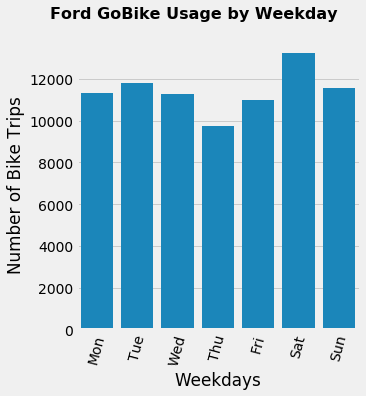

In [35]:
# Weekday usage of the Gobike system

weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
graph = sb.catplot(data=df_clean, x='started_at_weekday', kind='count', color = no_color, order = weekday)
graph.set_axis_labels('Weekdays', 'Number of Bike Trips')
graph.fig.suptitle('Ford GoBike Usage by Weekday', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

#### From above analysis, we can tell that there are more users in Saturday than the other weekdays. Thursday has the less users.

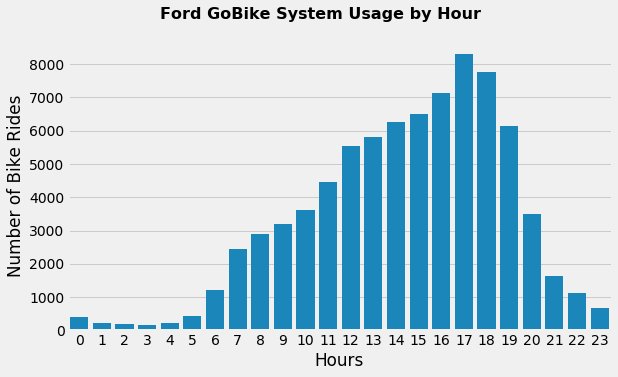

In [36]:
# Hourly usage of the Ford Go Bike System
graph = sb.catplot(data = df_clean, x='started_at_hour', kind='count', color = no_color, aspect = 1.7)
graph.set_axis_labels('Hours', 'Number of Bike Rides')
graph.fig.suptitle('Ford GoBike System Usage by Hour', y=1.05, fontsize=16, fontweight='bold');

#### From above analysis, we can tell that most people use the gobike system at 5 pm. 

In [37]:
# Observe duration_sec
df_clean['duration_sec'].describe()

count    79900.000000
mean      1039.245820
std       4475.912832
min     -86258.000000
25%        461.000000
50%        821.000000
75%       1449.000000
max      78242.000000
Name: duration_sec, dtype: float64

#### From above analyses, I can tell that the standard deviation is large which means duration time depending on individual user.

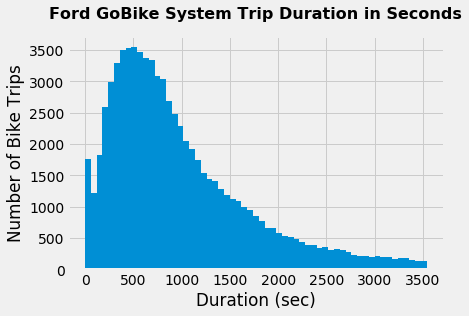

In [38]:
# Duration (seconds) of the bike rides
bin_edges = np.arange(0, 3600, 60)
plt.hist(data = df_clean, x = 'duration_sec', bins = bin_edges);
#plt.grid(b=None)
plt.title("Ford GoBike System Trip Duration in Seconds", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Duration (sec)')
plt.ylabel('Number of Bike Trips');

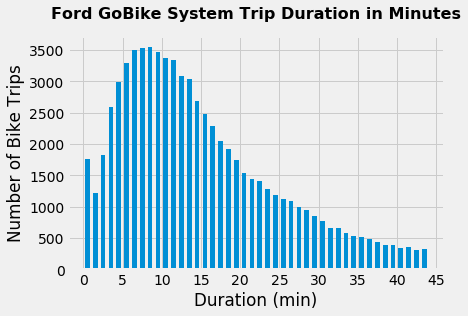

In [39]:
# Duration (minute) of the bike rides
bin_edges = np.arange(0, 45, 1)
ticks = [0, 5, 10, 15, 20, 25, 30,  35, 40, 45]
labels = ['{}'.format(val) for val in ticks]
plt.hist(data = df_clean, x = 'duration_min', bins = bin_edges, rwidth = 0.6);
plt.title("Ford GoBike System Trip Duration in Minutes", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Duration (min)')
plt.xticks(ticks, labels)
plt.ylabel('Number of Bike Trips');

#### From above two analyses, we can tell that more users are taking around 500 seconds or arond 8 minuates to rike the bike. It suggests that most of the users use the system for short distance. 

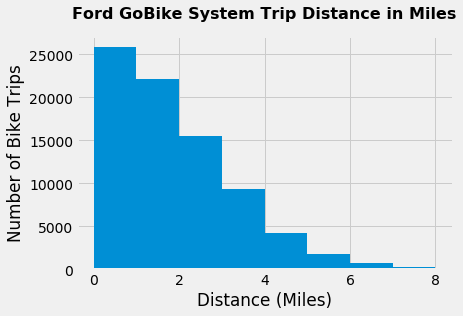

In [40]:
# Distance in km traveled
bin_edges = np.arange(0, 9, 1)

plt.hist(data = df_clean, x = 'distance_km', bins = bin_edges);

plt.title("Ford GoBike System Trip Distance in Miles", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Distance (Miles)')
plt.ylabel('Number of Bike Trips');

In [41]:
df_clean.distance_km.mean()

1.867835263196229

#### The mean distance traveled is about 1.87 miles. From above analysis we can tell that a majority of the rides fall under 2 miles. And less or equal 1 mile has the most users.

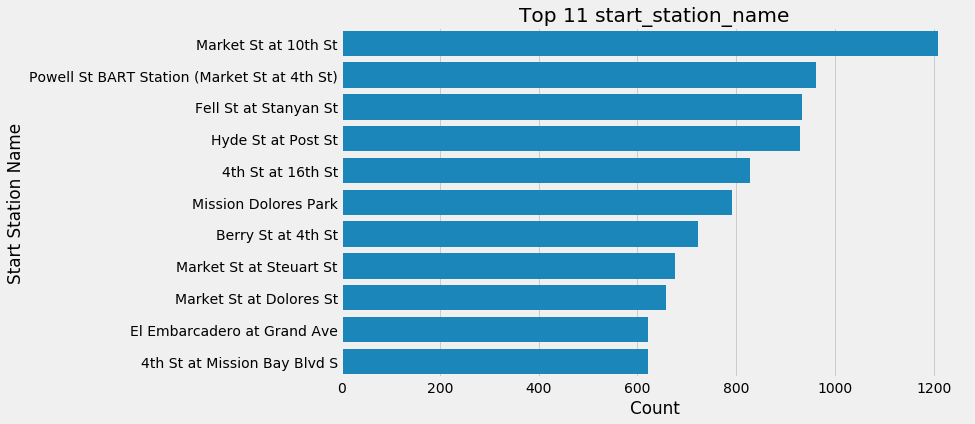

In [42]:
# Top 11 start_station_name

Threshold = 600
make_frequency = df_clean['start_station_name'].value_counts()
idx = np.sum(make_frequency > Threshold)

most_makes = make_frequency.index[:idx]
df_sub = df_clean.loc[df_clean['start_station_name'].isin(most_makes)]

plt.figure(figsize=[10,6])
plt.title('Top 11 start_station_name')
base_color = sb.color_palette()[0]
sb.countplot(data=df_sub, y='start_station_name', color = base_color, order = most_makes);
plt.ylabel('Start Station Name')
plt.xlabel('Count');

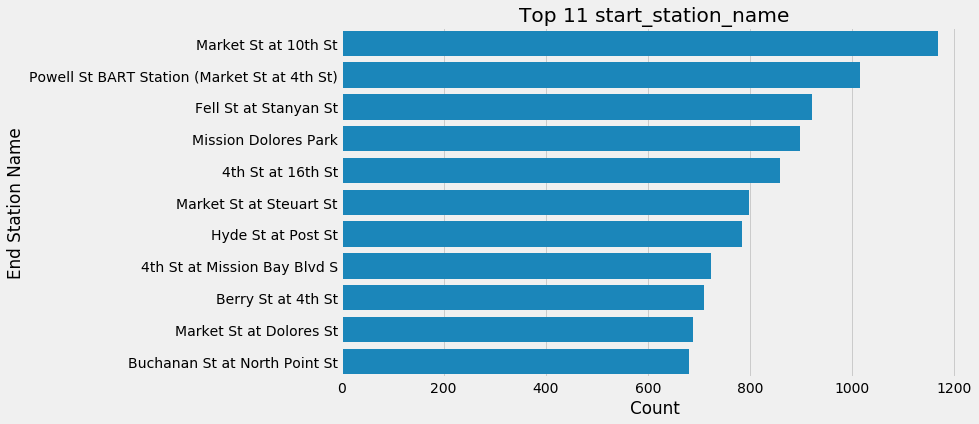

In [43]:
# Top 11 end_station_name

Threshold = 650
make_frequency = df_clean['end_station_name'].value_counts()
idx = np.sum(make_frequency > Threshold)

most_makes = make_frequency.index[:idx]
df_sub = df_clean.loc[df_clean['end_station_name'].isin(most_makes)]

plt.figure(figsize=[10,6])
plt.title('Top 11 start_station_name')
base_color = sb.color_palette()[0]
sb.countplot(data=df_sub, y='end_station_name', color = base_color, order = most_makes);
plt.ylabel('End Station Name')
plt.xlabel('Count');

#### From above analyses we can tell that Market St at 10th St is the most popular station for both start station and end station. We can guess that there are more people living around that area.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Becuase we did the data cleaning first before digging into the data, the distributions are reasonable and understandable.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

There is nothing out of the normal expectations for me.  

<a id='bivariate'></a>
## Bivariate Wrangling

> In this section, I investigate the relationships between pairs of variables in the data.

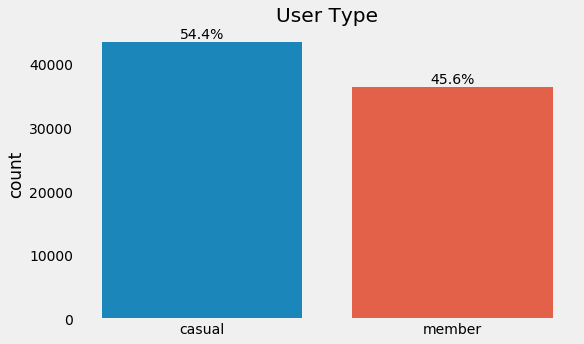

In [44]:
# Observe member_casual

count = len(df_clean)
plt.figure(figsize=[8,5])

ax = sb.countplot(data = df_clean, x = 'member_casual')
ax.grid(False)
plt.title('User Type')
plt.xlabel('');

for i in ax.patches:
    x = i.get_bbox().get_points()[:,0]
    y = i.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/count), (x.mean(), y), ha='center', va='bottom')

#### From above analysis, I can tell that users who are casual (54.4%) are 8.8% higher than users who are members (45.6%). 

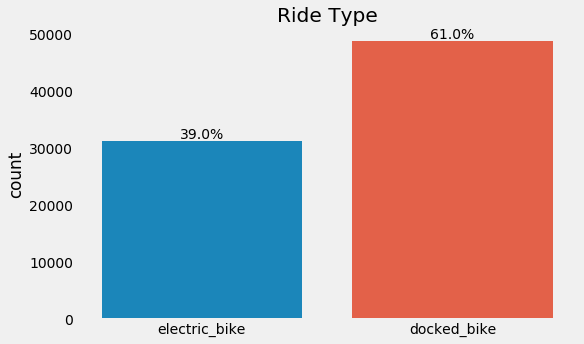

In [45]:
# Observe rideable type

count = len(df_clean)
plt.figure(figsize=[8,5])

ax = sb.countplot(data = df_clean, x = 'rideable_type')
ax.grid(False)
plt.title('Ride Type')
plt.xlabel('');

for i in ax.patches:
    x = i.get_bbox().get_points()[:,0]
    y = i.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/count), (x.mean(), y), ha='center', va='bottom') 

#### From above analysis, I can tell that users who choose docked bike (61.0%) is 22% higher than users who choose electric bike (39%).

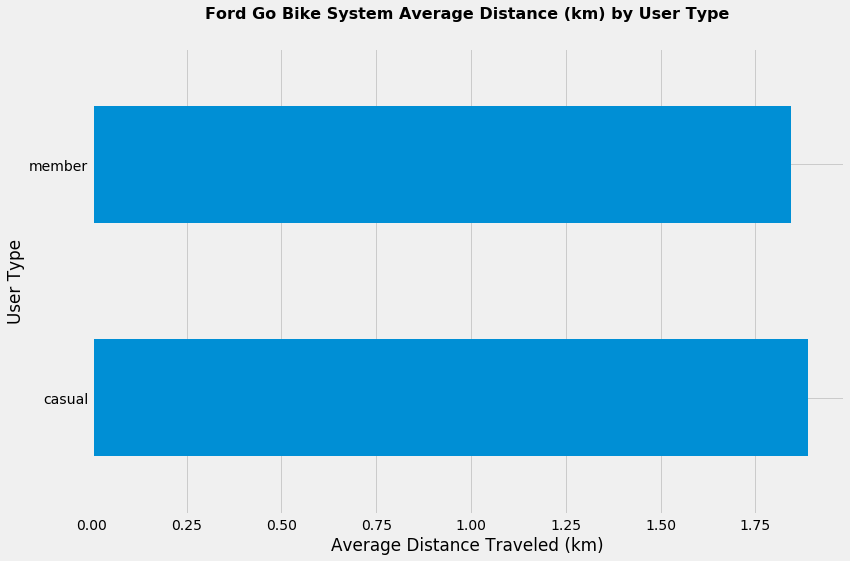

In [46]:
# Customer Usage by Distance vs. Subscriber Usage by Distance
plt = df_clean.groupby('member_casual')['distance_km'].mean().plot(kind='barh', figsize=(12,8));

plt.set_title('Ford Go Bike System Average Distance (km) by User Type', y=1.05, fontsize=16, fontweight='bold')
plt.set_ylabel('User Type')
plt.set_xlabel('Average Distance Traveled (km)');

#### From above analysis, we can tell that casual users have the higer average distance than member users.

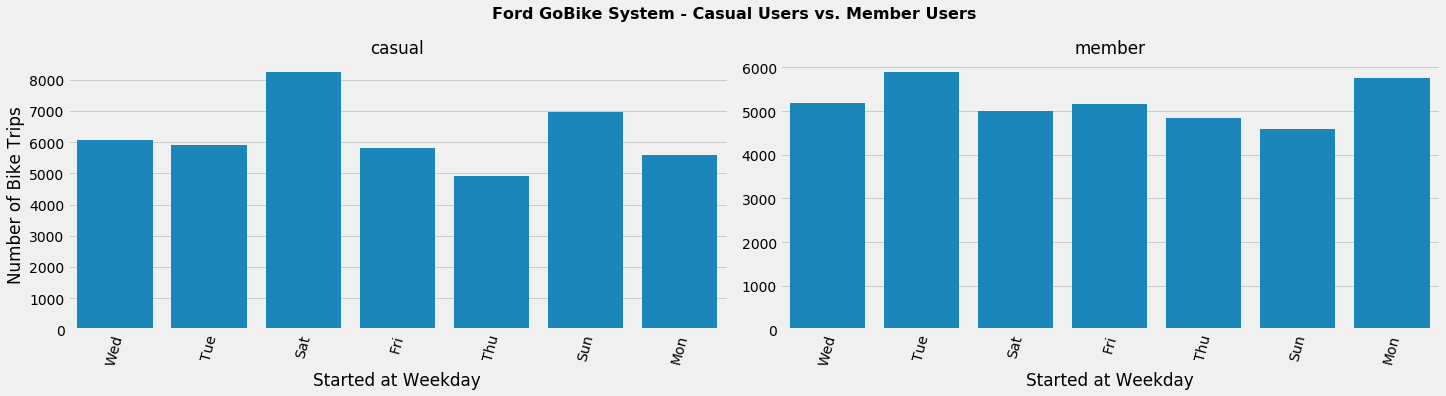

In [48]:
# Casual Users Usage by Duration vs. Member Users Usage by Duration

graph = sb.catplot(data=df_clean, x = 'started_at_weekday', col='member_casual', kind='count', sharey = False, color = no_color, height=5, aspect=2);

graph.set_axis_labels('Started at Weekday', 'Number of Bike Trips')
graph.set_titles('{col_name}')

graph.fig.suptitle('Ford GoBike System - Casual Users vs. Member Users', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

#### From above analyses, we can tell that Saturday has the most user number for casual users. However, Tuesday has the most user number for member users.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Becuase we did the data cleaning first before digging into the data, the distributions are reasonable and understandable.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

There is a difference in the trip duration between casual users and member users. Casual users' trips are usually longer than for member users, most probably due to the fact they prefer riding bike around weekends, which may be for longer trips around the surrounding area. Member users use the system mainly for commute purposes so they prefer quick, short rides to and from work.

<a id='multivariate'></a>
## Multivariate Exploration

> I investigate plots of three or more variables to dig into the data further.

Text(25.200000000000003, 0.5, 'Start Time Hour')

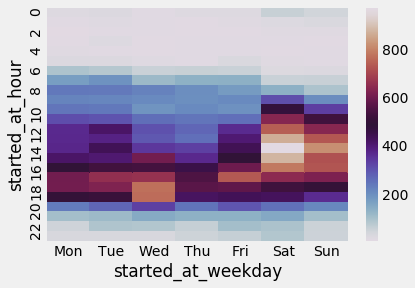

In [50]:
# Weekday order
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df_clean['started_at_weekday'] = pd.Categorical(df_clean['started_at_weekday'], categories= ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True);

df_casual = df_clean.query('member_casual == "casual"').groupby(['started_at_hour', 'started_at_weekday'])['ride_id'].size().reset_index();
df_casual = df_casual.pivot('started_at_hour', 'started_at_weekday', 'ride_id')

heat_map = sb.heatmap(df_casual, cmap = 'twilight')

plt.set_title('Casual User', y=1.05)
plt.set_xlabel('Weekday', labelpad = 16)
plt.set_ylabel('Start Time Hour',  labelpad = 16)

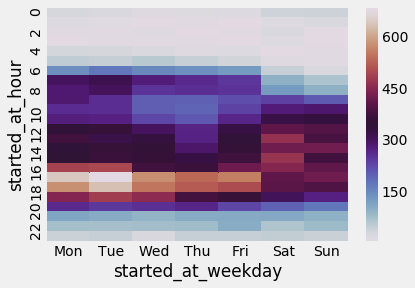

In [51]:
df_member = df_clean.query('member_casual == "member"').groupby(['started_at_hour', 'started_at_weekday'])['ride_id'].size().reset_index();
df_member = df_member.pivot('started_at_hour', 'started_at_weekday', 'ride_id')
hot_map = sb.heatmap(df_member, cmap = 'twilight')

plt.set_title("Subscriber", y=1.05)
plt.set_xlabel('Weekday', labelpad = 16)
plt.set_ylabel('Start Time Hour', labelpad = 16);

#### Casual users use the system more often on weekends, while member users primarily use the bikes on weekdays. 
- Casual Users: During weekdays, most people use the system between 4-6pm. During weeknds, most bike rides occur between 12am and 14pm.
- Member Users: During weekdays, most bike rides occur around 4-6pm. During weekends, there is a significant drop in the number of rented bikes.

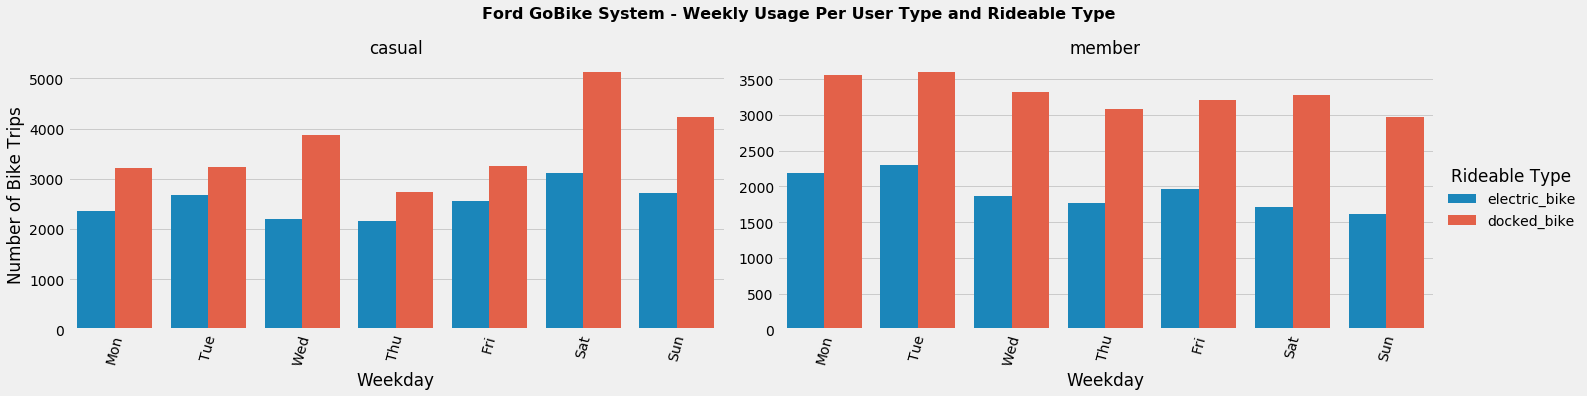

In [52]:
# Weekly usage - user type and rideable type
graph = sb.catplot(data=df_clean, x='started_at_weekday', col="member_casual", hue="rideable_type", kind='count', sharey = False, height=5, aspect=2);

graph.set_axis_labels("Weekday", "Number of Bike Trips")
graph._legend.set_title('Rideable Type')
graph.set_titles("{col_name}")

graph.fig.suptitle('Ford GoBike System - Weekly Usage Per User Type and Rideable Type', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

#### The trend for electric bike and docked bike is similar for member users, the highest demand is Monday and Tuesday. For casual users, the highest demand for electric bike and docked bike is Saturday. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In this section, I used multiple features to do the analyses through data visualization and try to get more sophisticated insight. From above analyses, we know that during weekdays, both casual users and member users tend to use the system between 4 and 6 pm. However, casual users use the system between 12am and 14 pm during the weekend but much less member users use the system during the weekend.

### Were there any interesting or surprising interactions between features?

> Nothing out of the expected here. It was interesting to compare weekly difference for casual users v.s member users, and see the trend for the electric bike and docked bike. 